# LAB0 — Introdução prática ao ambiente Python para PDI

Disciplina: **Processamento Digital de Imagens (PDI)**  -- UFPel  
Professor: **Guilherme Corrêa**  
Formato: *Notebook Google Colab*   
Objetivo: ambientar o aluno no ecossistema Python e revisar operações matriciais e operações básicas com imagens.

**Conteúdos desta prática**
- Configuração do ambiente (Colab/Jupyter) e bibliotecas (`numpy`, `matplotlib`, `scikit-image`, `opencv-python`, `imageio`).
- Operações com vetores e matrizes (criação, slicing, broadcasting, álgebra linear).
- Leitura de uma imagem PNG, exibição com Matplotlib, inspeção de `shape`/`dtype`.
- Separação e visualização de canais de cor (R, G, B).
- Salvamento de imagens geradas.
- Mini-desafios para fixação.


## 1) Configuração rápida (Colab ou local)

### Em **Google Colab**:
- Basta executar a célula abaixo; ela instalará as bibliotecas necessárias. Em geral, no Google Colab, esses pacotes já vêm pré-instalados, mas essa linha garante que todos estão presentes e atualizados.
- Para enviar/baixar arquivos, use o painel lateral do Colab ou `files.upload()`.

### Em **Jupyter local** (Anaconda/Miniconda):
```bash
conda create -n pdi python=3.11 -y
conda activate pdi
pip install numpy matplotlib scikit-image opencv-python imageio
jupyter lab
```


In [24]:
# Se estiver no Colab, descomente a linha abaixo para instalar dependências.
# (Executar uma única vez. Pode levar ~1-2 min.)
!pip -q install numpy matplotlib scikit-image opencv-python imageio imageio[pyav]

# Pacotes instalados:
# numpy → operações numéricas e matriciais.
# matplotlib → visualização e gráficos.
# scikit-image → funções de processamento de imagens (filtros, segmentação, transformações).
# opencv-python (cv2) → biblioteca muito usada em visão computacional.
# imageio → leitura e escrita de imagens em vários formatos.

import sys, platform
print("Python:", sys.version.split()[0], "| Plataforma:", platform.platform())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 37.8 MB/s eta 0:00:00
Python: 3.12.11 | Plataforma: Linux-6.1.123+-x86_64-with-glibc2.35


## 2) Imports e verificação de versões
Rodar a célula para garantir que tudo está OK.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, data, img_as_ubyte
import imageio.v2 as imageio
import cv2

print("NumPy:", np.__version__)
print("Matplotlib:", plt.matplotlib.__version__)
import skimage, imageio
print("scikit-image:", skimage.__version__)
print("imageio:", imageio.__version__)
print("OpenCV:", cv2.__version__)

## 3) Operações fundamentais com vetores e matrizes
Criação, *slicing*, *broadcasting* e operações de álgebra linear.

In [ ]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.int32)
B = A.T
print("A=\n", A)
print("B=A.T=\n", B)
print("diag(A)=", np.diag(A))
print("sum(A)=", A.sum())
print("sum por eixo 0 (colunas)=", A.sum(axis=0))
print("sum por eixo 1 (linhas)=", A.sum(axis=1))

# Indexação, slicing, operador 'end' equivalente usando -1
print("A[1,2]=", A[1,2])  # segunda linha, terceira coluna
print("A[1,:]=", A[1,:])  # segunda linha completa
print("A[:, -1]=", A[:, -1])  # última coluna

# Broadcasting e operações elemento a elemento
x = np.arange(1, 11)
table = np.column_stack([x, x**2, x**3])
print("\nTabela n, n^2, n^3:\n", table)

# Álgebra linear
M = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=float)
v = np.array([1, 1, 1], dtype=float)
print("\nM@v=", M @ v)  # produto matriz-vetor

### Desafio 1
Usando a matriz `A` definida acima, **substitua todos os valores iguais a 5 por 0** (dica: `np.where` ou indexação booleana).

In [ ]:
# Solução
A2 = A.copy()
A2[A2 == 5] = 0
print(A2)

## 4) Lendo e exibindo uma imagem PNG
Usaremos uma imagem de exemplo do `scikit-image` (astronauta), mas se quiser você pode carregar uma imagem PNG do Google Drive, fazer upload via Colab ou ler de um caminho local.

shape: (512, 512, 3) dtype: uint8


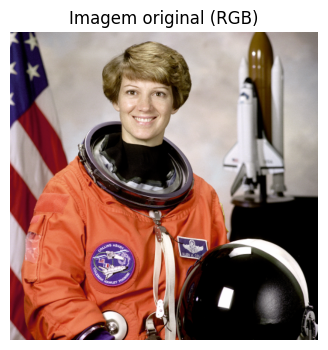

In [41]:
# Carrega uma imagem de exemplo (colorida, RGB)
img = data.astronaut()  # shape (512, 512, 3), dtype uint8
print("shape:", img.shape, "dtype:", img.dtype)

# Exibe com Matplotlib (atenção: imshow espera RGB com valores 0..255 (uint8) ou 0..1 (float))
plt.figure(figsize=(4,4))
plt.imshow(img)
plt.title("Astronaut (RGB)")
plt.axis('off')
plt.show()

shape: (2048, 1535, 3) dtype: uint8


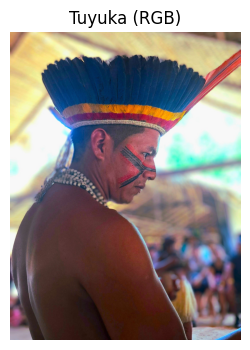

In [42]:
# Carrega uma imagem de exemplo (colorida, RGB)
import imageio.v2 as imageio
url = "https://raw.githubusercontent.com/guirco/ufpel-pdi/main/data/tuyuka.png"
img2 = imageio.imread(url)
print("shape:", img2.shape, "dtype:", img2.dtype)

# Exibe com Matplotlib (atenção: imshow espera RGB com valores 0..255 (uint8) ou 0..1 (float))
plt.figure(figsize=(4,4))
plt.imshow(img2)
plt.title("Tuyuka (RGB)")
plt.axis('off')
plt.show()

## 5) Separando canais de cor (R, G, B)
Em `numpy`, um array RGB tem shape `(altura, largura, 3)`. O último eixo são os canais.

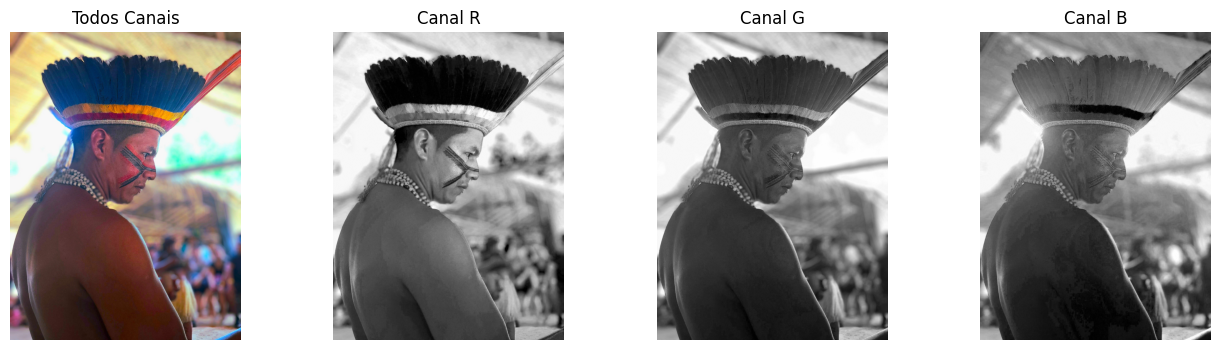

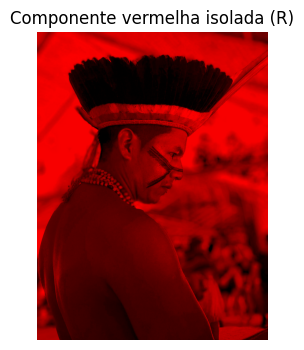

In [52]:
R = img2[:, :, 0]
G = img2[:, :, 1]
B = img2[:, :, 2]

fig, axs = plt.subplots(1, 4, figsize=(16,4))
axs[0].imshow(img2)
axs[0].set_title('Todos Canais')
axs[0].axis('off')
axs[1].imshow(R, cmap='gray')
axs[1].set_title('Canal R')
axs[1].axis('off')
axs[2].imshow(G, cmap='gray')
axs[2].set_title('Canal G')
axs[2].axis('off')
axs[3].imshow(B, cmap='gray')
axs[3].set_title('Canal B')
axs[3].axis('off')
plt.show()

# Visualizar imagem usando apenas um canal repetido (ex.: vermelho)
only_red = np.zeros_like(img2)
only_red[:,:,0] = R
plt.figure(figsize=(4,4))
plt.imshow(only_red)
plt.title("Componente vermelha isolada (R)")
plt.axis('off')
plt.show()
io.imsave("red_tuyuka.png", only_red)  # salva em disco, no arquivo "red_astronaut.png"

💡 **Por que usamos PNG nestes exemplos?**

- O formato **PNG** é **lossless** (compressão sem perdas), preservando todos os pixels originais.  
- Permite trabalhar tanto com imagens **coloridas (RGB)** quanto em **tons de cinza**.  
- É amplamente suportado por bibliotecas como `matplotlib`, `scikit-image`, `opencv` e `imageio`.  
- É um formato **aberto e livre de patentes**, diferente de alguns codecs proprietários.  

👉 Por isso, neste LAB e nos seguintes usaremos PNG como formato de teste — garantindo fidelidade e portabilidade.


### Dica
OpenCV (`cv2`) lê imagens por padrão em **BGR**. Se usar `cv2.imread`, converta para RGB com `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)` antes de exibir com Matplotlib.

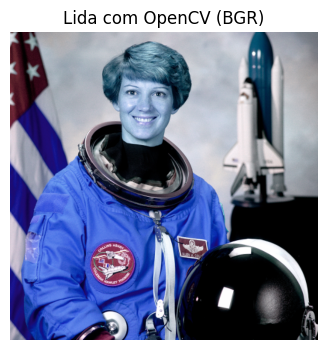

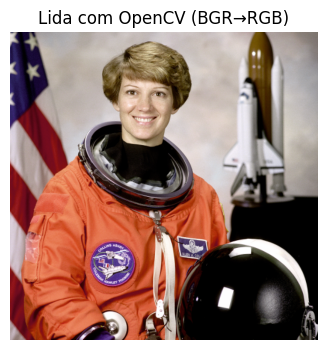

In [47]:
# Exemplo com OpenCV (imagem de exemplo salva e relida):
tmp_path = "astronaut.png"
io.imsave(tmp_path, img)  # salva em disco, no arquivo "astronaut.png"

img_bgr = cv2.imread(tmp_path)           # lendo a imagem com OpenCV (formato BGR)

plt.figure(figsize=(4,4))
plt.imshow(img_bgr)
plt.title("Lida com OpenCV (BGR)")
plt.axis('off')
plt.show()

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)     # convertendo a imagem para RGB

plt.figure(figsize=(4,4))
plt.imshow(img_rgb)
plt.title("Lida com OpenCV (BGR→RGB)")
plt.axis('off')
plt.show()

## 6) Conversões de cor rápidas (RGB↔Gray, RGB↔HSV)
Algumas transformações úteis usando `scikit-image` e `OpenCV`.

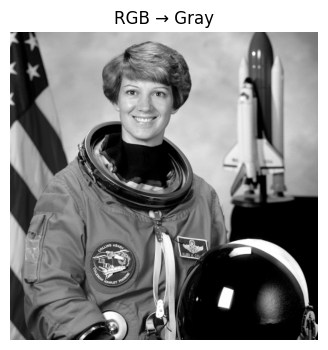

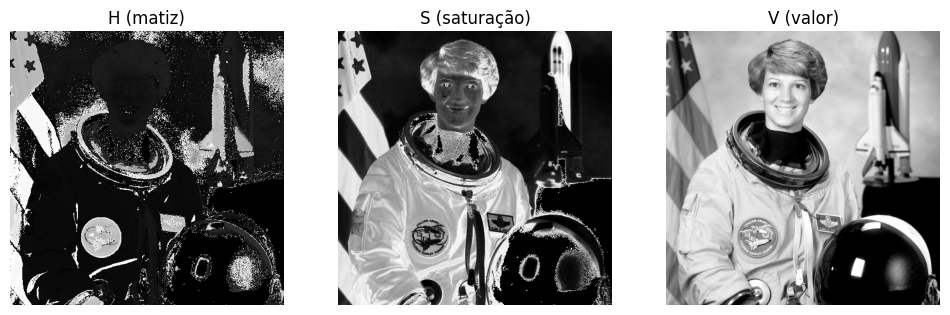

In [50]:
gray = color.rgb2gray(img)   # float64, range 0..1
plt.figure(figsize=(4,4))
plt.imshow(gray, cmap='gray')
plt.title("RGB → Gray")
plt.axis('off')
plt.show()

hsv = color.rgb2hsv(img)
fig, axs = plt.subplots(1,3, figsize=(12,4))
labels = ['H (matiz)','S (saturação)','V (valor)']
for i in range(3):
    axs[i].imshow(hsv[:,:,i], cmap='gray')
    axs[i].set_title(labels[i])
    axs[i].axis('off')
plt.show()

## 7) Salvando imagens
Atenção ao tipo e faixa de valores: use `img_as_ubyte` quando necessário.

In [57]:
io.imsave("gray_uint8.png", img_as_ubyte(gray))
print("Arquivos salvos na pasta atual:")
print(os.getcwd())
import os
for f in os.listdir():
    if f.endswith('.png'):
        print(" -", f)

Arquivos salvos na pasta atual:
/content
 - gray_uint8.png
 - red_tuyuka.png
 - astronaut.png


## 8) Mini-desafios
1. Carregue **uma imagem sua** (PNG ou JPG) e repita o procedimento: exibir, mostrar `shape`/`dtype`, e visualizar os três canais de cores separadamente.
2. Zere o canal **G** (verde) e observe o efeito.
3. Converta a imagem para **HSV** e visualize separadamente H, S e V. Qual canal melhor preserva a estrutura (bordas)?
4. Gere uma nova imagem `montagem` empilhando horizontalmente os canais em escala de cinza (ex.: `[R | G | B]`).

---
**Observação para entrega** (sugestão):
- Submeter o `.ipynb` + export em **HTML** com resultado das células executadas;
- Incluir uma pasta `data/` no repositório com as imagens de teste utilizadas.

Boa prática!